In [2]:
import sys, os
sys.path.append(os.pardir)

import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True)
x_train = x_train[:300]
t_train = t_train[:300]
#오버피팅을 재현하기 위해 학습데이터 수를 줄임 


In [3]:
network = MultiLayerNet(input_size = 784, hidden_size_list = [100, 100, 100, 100, 100, 100], output_size = 10)
optimizer = SGD(lr = 0.01) #학습률이 0.01인 SGD로 매개변수 갱신 
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0
for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

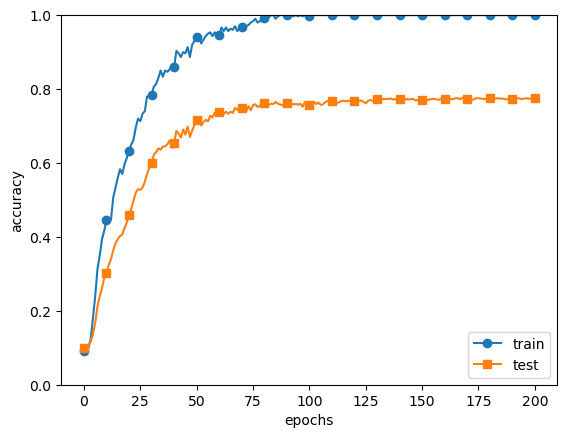

In [4]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

epoch:0, train acc:0.11333333333333333, test acc:0.0987
epoch:1, train acc:0.11666666666666667, test acc:0.0996
epoch:2, train acc:0.12333333333333334, test acc:0.1017
epoch:3, train acc:0.13333333333333333, test acc:0.1085
epoch:4, train acc:0.14, test acc:0.1167
epoch:5, train acc:0.15666666666666668, test acc:0.1239
epoch:6, train acc:0.16333333333333333, test acc:0.1301
epoch:7, train acc:0.17, test acc:0.1385
epoch:8, train acc:0.19333333333333333, test acc:0.1478
epoch:9, train acc:0.21, test acc:0.1565
epoch:10, train acc:0.21666666666666667, test acc:0.1675
epoch:11, train acc:0.25, test acc:0.1915
epoch:12, train acc:0.2866666666666667, test acc:0.2047
epoch:13, train acc:0.2966666666666667, test acc:0.2241
epoch:14, train acc:0.31666666666666665, test acc:0.2427
epoch:15, train acc:0.31333333333333335, test acc:0.2486
epoch:16, train acc:0.3233333333333333, test acc:0.2569
epoch:17, train acc:0.3433333333333333, test acc:0.2665
epoch:18, train acc:0.3566666666666667, test acc

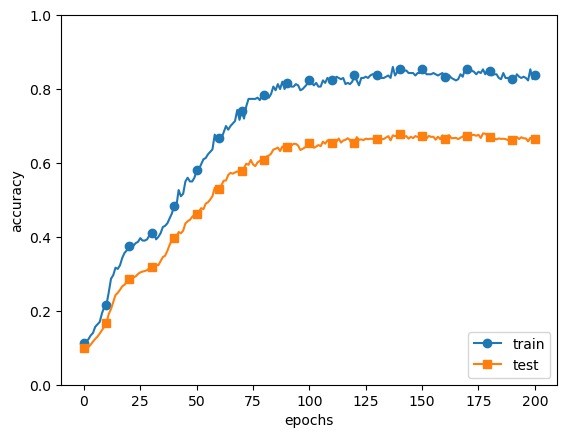

In [6]:
import sys, os
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 과대적합을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

weight_decay_lambda = 0.1 # 가중치 감쇠 설정

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [9]:
class Dropout:
    def __init__(self, dropout_ratio = 0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
    def forward(self, x, train_flg =True):
        if train_flg:
            self.mask = np.random.randn(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
    def backward(self, dout):
        return dout * self.mask
            

train loss:2.297518001203091
=== epoch:1, train acc:0.11333333333333333, test acc:0.1051 ===
train loss:2.2819123867616895
train loss:2.3117310028492266
train loss:2.3063223565332804
=== epoch:2, train acc:0.11666666666666667, test acc:0.1061 ===
train loss:2.3091026549244664
train loss:2.31634103299314
train loss:2.3102384763262975
=== epoch:3, train acc:0.12, test acc:0.1078 ===
train loss:2.2955949155876385
train loss:2.3038112726505036
train loss:2.3058058977126974
=== epoch:4, train acc:0.12, test acc:0.1086 ===
train loss:2.3010882100226984
train loss:2.305899858976031
train loss:2.2985668330408253
=== epoch:5, train acc:0.11666666666666667, test acc:0.1085 ===
train loss:2.3073778992505765
train loss:2.2955855473546785
train loss:2.2972092767635
=== epoch:6, train acc:0.12, test acc:0.1092 ===
train loss:2.2957579872499503
train loss:2.2866076958272292
train loss:2.3158860904843888
=== epoch:7, train acc:0.12333333333333334, test acc:0.1099 ===
train loss:2.2969881565778674
trai

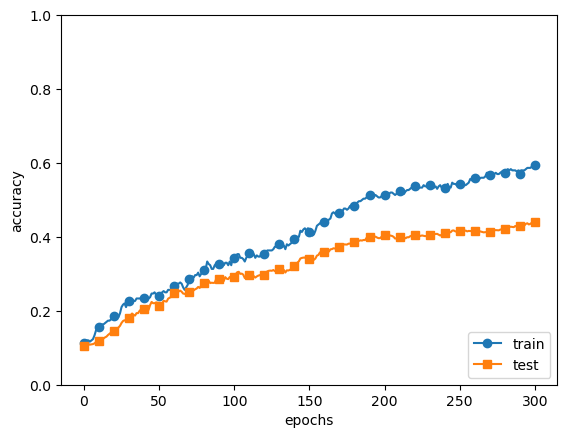

In [13]:
import sys, os
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비율 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [15]:

import sys, os
sys.path.append(os.pardir)
from common.util import *
(x_train, t_train), (x_test, t_test) = load_mnist()

#훈련 데이터를 뒤섞는다. 
x_train, t_train = shuffle_dataset(x_train, t_train)
#20프로를 검증데이터로 분할 
validation_rate = 0.2
validation_num = int(x_train.shape[0] * validation_rate)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


val acc:0.47 | lr:0.0019165860501880896, weight decay:1.87286127594172e-08
val acc:0.14 | lr:6.940309680426938e-05, weight decay:3.480169136715104e-05
val acc:0.07 | lr:9.645076690172938e-06, weight decay:1.457778243358683e-07
val acc:0.68 | lr:0.004633766083892492, weight decay:8.58596160879589e-06
val acc:0.08 | lr:2.5609218309045017e-05, weight decay:8.393278023000839e-07
val acc:0.09 | lr:1.531127348136532e-05, weight decay:5.423073390501463e-08
val acc:0.07 | lr:4.468276681150449e-06, weight decay:7.171189186193595e-06
val acc:0.08 | lr:4.710181293669453e-06, weight decay:4.370648164650716e-08
val acc:0.11 | lr:6.639051723461918e-06, weight decay:2.8308698486878044e-08
val acc:0.75 | lr:0.0072069828214935735, weight decay:1.3446667820836094e-08
val acc:0.16 | lr:0.000754967641826479, weight decay:6.397263912355946e-05
val acc:0.17 | lr:0.000656108024159934, weight decay:1.762471505800615e-05
val acc:0.13 | lr:8.997441224274673e-06, weight decay:4.893547463757427e-06
val acc:0.21 |

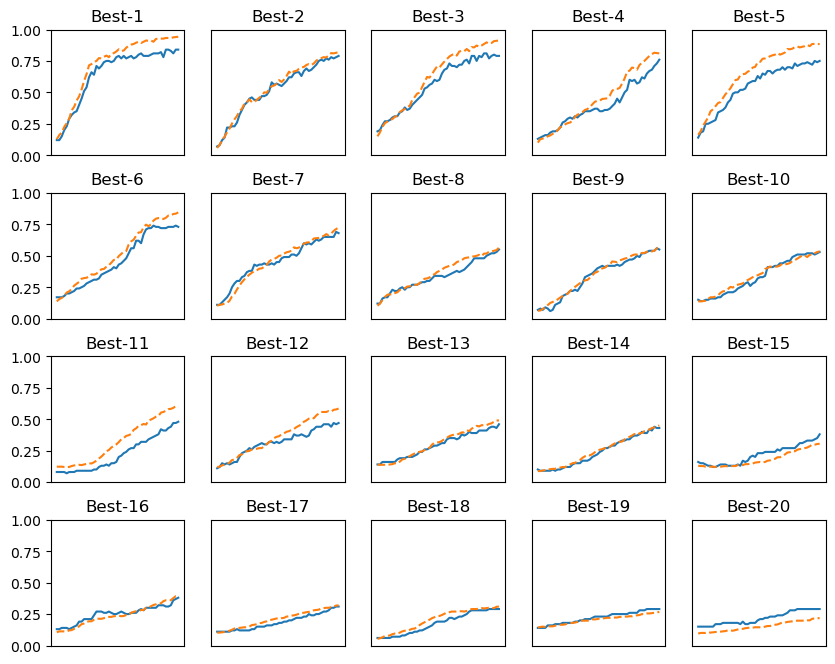

In [16]:
import sys, os
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

plt.figure(figsize=(10, 8))

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.subplots_adjust(wspace=0.2, hspace=0.3)    
plt.show()